In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  ReLU
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore') 


shap.initjs()

%matplotlib inline

df=pd.read_csv('Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [3]:
df.isnull().sum().any()

False

In [4]:
df['customer_id'].duplicated().any()

False

In [5]:
dummies = pd.get_dummies(df.country,dtype='int')

In [6]:
dummies

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [7]:
df.replace({'Male': 1,'Female':0}, inplace=True)

In [8]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [9]:
merged= pd.concat([df,dummies],axis=1)
merged

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,15569892,516,France,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,15584532,709,France,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,15682355,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [10]:
merged.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'France', 'Germany', 'Spain'],
      dtype='object')

In [11]:
x=merged.drop(columns=['customer_id','country', 'churn', 'France'], axis=1)

In [12]:
x

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0


In [13]:
y=merged['churn']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=33)

In [15]:
scaler=StandardScaler().fit(x_train)
x_train=scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
x_test

array([[-0.32299891,  0.91113174, -0.95311948, ...,  1.63210431,
        -0.58494596, -0.57468161],
       [ 0.65972703,  0.91113174,  2.28050213, ...,  1.15302745,
        -0.58494596, -0.57468161],
       [-0.24024304,  0.91113174,  2.18539561, ...,  0.74432865,
         1.70955963, -0.57468161],
       ...,
       [ 0.2356032 ,  0.91113174,  1.90007606, ..., -1.37153841,
        -0.58494596, -0.57468161],
       [ 0.38042597, -1.09753612,  0.47347829, ...,  0.04975582,
        -0.58494596, -0.57468161],
       [ 1.88037609,  0.91113174, -0.95311948, ..., -1.55610964,
        -0.58494596,  1.74009395]])

In [17]:
## Inertialising ANN
model=Sequential()

In [18]:
# input layer
model.add(Dense(units=11,activation='relu'))

In [19]:
# first dense layer
model.add(Dense(units=7,activation='relu'))

In [20]:
# second dense layer
model.add(Dense(units=6,activation='relu'))

In [21]:
# ouput layer
model.add(Dense(units=1,activation='sigmoid'))

In [22]:
# compiler model 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
# early stopping 

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [37]:

model_history=model.fit(x_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(x_test,y_test),callbacks=early_stopping)


Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8711 - loss: 0.3097 - val_accuracy: 0.8572 - val_loss: 0.3417
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8751 - loss: 0.3098 - val_accuracy: 0.8536 - val_loss: 0.3413
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8791 - loss: 0.2992 - val_accuracy: 0.8508 - val_loss: 0.3416
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8680 - loss: 0.3172 - val_accuracy: 0.8560 - val_loss: 0.3428
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8750 - loss: 0.2992 - val_accuracy: 0.8544 - val_loss: 0.3415
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8703 - loss: 0.3106 - val_accuracy: 0.8604 - val_loss: 0.3445
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8766 - loss: 0.3093 - val_accuracy: 0.8552 - val_loss: 0.3422
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8733 - loss: 0.3092 - val_accu

In [38]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

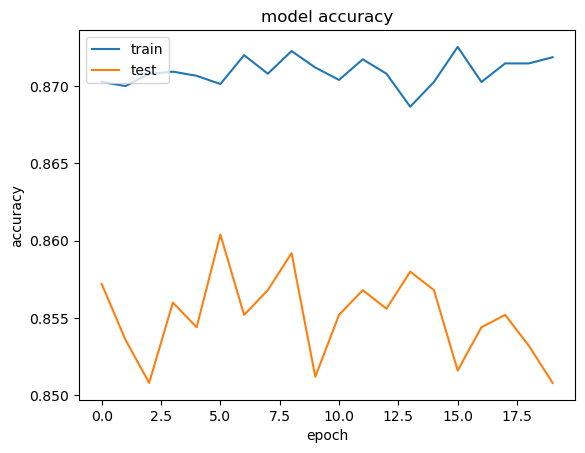

In [40]:
# summarizing history for accuracy 
plt.plot(model_history.history['accuracy']) 
plt.plot(model_history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train','test'],loc='upper left')
plt.show()

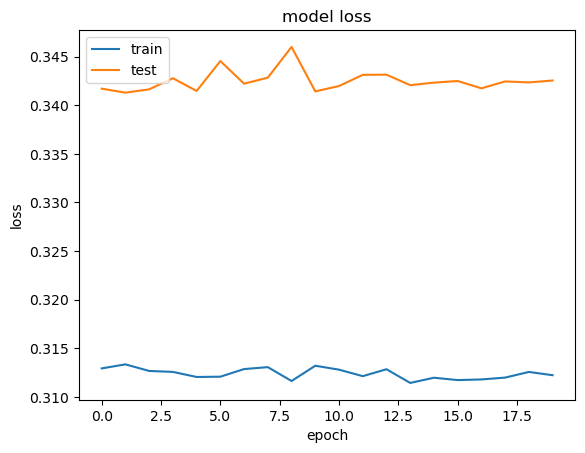

In [41]:
# summarizing history for loss
plt.plot(model_history.history['loss']) 
plt.plot(model_history.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(['train','test'],loc='upper left')
plt.show()

In [48]:
y_pred = model.predict(x_test) 
y_pred =(y_pred>=0.5)
accuracy_score(y_test,y_pred)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.8508

In [44]:
y_pred[:10]

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [45]:
y_test[:10]

5672    0
3346    0
5867    0
2322    0
5233    1
9075    1
5456    0
8670    0
3416    0
8653    0
Name: churn, dtype: int64

In [46]:
# Evaluating our model with some important metrices

confusion_matrix(y_test,y_pred)

array([[1911,  108],
       [ 265,  216]], dtype=int64)

In [47]:
## Further evaluation of our model using classification report
## The precision an recall score  are quite significant.

classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.95      0.91      2019\n           1       0.67      0.45      0.54       481\n\n    accuracy                           0.85      2500\n   macro avg       0.77      0.70      0.72      2500\nweighted avg       0.84      0.85      0.84      2500\n'

In [50]:
# get weight 

model.get_weights()

[array([[-2.7076969e-01,  2.6979876e-01, -1.9070198e-01,  1.4433642e-01,
         -2.7639401e-01,  9.2527412e-02,  1.2693390e-01, -2.7588159e-01,
          4.9944598e-02, -1.3922969e-01, -3.0532774e-01],
        [-1.8524390e-01, -2.7750242e-01,  5.1470276e-02, -1.4581874e-01,
          2.7873698e-01, -4.8429012e-02, -3.1309342e-01, -1.1728520e-01,
         -2.2073291e-01,  2.3927183e-01, -1.4704873e-01],
        [ 4.8439923e-01,  3.1429967e-01,  8.9243513e-01, -4.3830281e-01,
         -1.4203829e-01, -6.4161527e-01, -3.7494677e-01,  5.6023775e-03,
          1.0878655e+00,  2.2167620e-01, -8.3603516e-02],
        [-2.5592521e-01, -2.4982540e-01, -1.2901487e-03, -1.1807093e-01,
         -4.5427617e-02,  3.7596744e-01, -3.7912458e-01,  4.3972708e-02,
          9.3942583e-03,  2.9122645e-01,  2.4840008e-02],
        [ 6.1283205e-02,  2.3379959e-01, -1.1612437e-02, -7.5066894e-01,
         -6.5765470e-01, -1.1350888e+00, -3.4497893e-01,  8.0164135e-01,
         -3.5221852e-02, -4.6400702e-0